# Análisis de la segunda ola de la COVID-19




## Objetivo

El objetivo principal de este proyecto es poder analizar la evolución de la pandemia COVID-19 en esta segunda ola, haciendo uso de algoritmos de Machine Learning, y así poder realizar prediciones de su evolución.


## Prerrequisitos

Para poder realizar el proyecto debemos tener instalados en nuestro sistema una serie de librerías de Data Science y Machine Learning. A continuación quedan indicadas las mismas:

- Numpy
- Pandas
- Scikit-Learn
- MatplotLib
- Seaborn

Todas estas librerías estan ya instaladas en el entorno de trabajo de ANACONDA 3. Solo deberemos importar las mismas.

## Configuración del entorno

In [1]:
import warnings
warnings.filterwarnings("ignore")
import datetime
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Dataset

Para analizar este problema vamos a descargarnos un dataset que pone a disposición la Unión Europea en la siguiente url:

https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide

In [2]:
df = pd.read_excel("../Modulo 3/Dataset/COVID-19-geographic-disbtribution-worldwide-2020-11-03.xlsx")

Comprobamos los datos que hemos cargado en nuestro dataFrame

In [3]:
df.head(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-11-03,3,11,2020,95,3,Afghanistan,AF,AFG,38041757.0,Asia,3.787943
1,2020-11-02,2,11,2020,132,5,Afghanistan,AF,AFG,38041757.0,Asia,3.766913
2,2020-11-01,1,11,2020,76,0,Afghanistan,AF,AFG,38041757.0,Asia,3.575019
3,2020-10-31,31,10,2020,157,4,Afghanistan,AF,AFG,38041757.0,Asia,3.553989
4,2020-10-30,30,10,2020,123,3,Afghanistan,AF,AFG,38041757.0,Asia,3.264833
5,2020-10-29,29,10,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,2.941505
6,2020-10-28,28,10,2020,113,7,Afghanistan,AF,AFG,38041757.0,Asia,3.025623
7,2020-10-27,27,10,2020,199,8,Afghanistan,AF,AFG,38041757.0,Asia,2.902074
8,2020-10-26,26,10,2020,65,3,Afghanistan,AF,AFG,38041757.0,Asia,2.718066
9,2020-10-25,25,10,2020,81,4,Afghanistan,AF,AFG,38041757.0,Asia,2.799555


In [4]:
df.tail(10)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
53156,2020-03-30,30,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
53157,2020-03-29,29,3,2020,2,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
53158,2020-03-28,28,3,2020,2,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
53159,2020-03-27,27,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
53160,2020-03-26,26,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
53161,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
53162,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
53163,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
53164,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
53165,2020-03-21,21,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


Comprobamos la info del DataFrame con el objetivo de determinar las columnas del df y el tipo de datos que contiene cada una de ellas. De esta forma, podremos realizar cualquier cambio de forma correcta según la tipología de los datos.

También se comprobaran los datos estadísticos principales.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53166 entries, 0 to 53165
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     53166 non-null  datetime64[ns]
 1   day                                                         53166 non-null  int64         
 2   month                                                       53166 non-null  int64         
 3   year                                                        53166 non-null  int64         
 4   cases                                                       53166 non-null  int64         
 5   deaths                                                      53166 non-null  int64         
 6   countriesAndTerritories                                     53166 non-null  object        
 7   geoId                 

In [6]:
df.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,53166.000000,53166.000000,53166.000000,53166.000000,53166.000000,5.308400e+04,50348.000000
mean,15.936708,6.366512,2019.998740,885.777038,22.707934,4.175643e+07,45.824057
std,8.918328,2.575420,0.035477,4977.075371,124.073255,1.550772e+08,112.109316
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,4.000000,2020.000000,0.000000,0.000000,1.324820e+06,0.555858
50%,16.000000,6.000000,2020.000000,12.000000,0.000000,7.813207e+06,5.652028
75%,24.000000,9.000000,2020.000000,202.000000,3.000000,2.860872e+07,39.292731
max,31.000000,12.000000,2020.000000,101273.000000,4928.000000,1.433784e+09,1900.836210


El primer paso será cambiar el nombre de la columna 'Cumulative_number_for_days_of_COVID-19_cases_per_100000'

In [7]:
df = df.rename(
{'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000': 'Cum14_cases_100k'}, axis = 1)
df

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cum14_cases_100k
0,2020-11-03,3,11,2020,95,3,Afghanistan,AF,AFG,38041757.0,Asia,3.787943
1,2020-11-02,2,11,2020,132,5,Afghanistan,AF,AFG,38041757.0,Asia,3.766913
2,2020-11-01,1,11,2020,76,0,Afghanistan,AF,AFG,38041757.0,Asia,3.575019
3,2020-10-31,31,10,2020,157,4,Afghanistan,AF,AFG,38041757.0,Asia,3.553989
4,2020-10-30,30,10,2020,123,3,Afghanistan,AF,AFG,38041757.0,Asia,3.264833
...,...,...,...,...,...,...,...,...,...,...,...,...
53161,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
53162,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
53163,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
53164,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


También se utilizará la columna dataRep como índice del DataFrame.

In [8]:
df.set_index('dateRep', inplace=True)

Y ordenamos el DataFrame por el nuevo ínidice marcado. De esta forma tendremos ordenado el df mediante la fecha de los datos.

In [9]:
df.sort_index(inplace=True)
df

,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cum14_cases_100k
dateRep,,,,,,,,,,,
2019-12-31,31,12,2019,0,0,Nigeria,NG,NGA,200963603.0,Africa,NaN
2019-12-31,31,12,2019,0,0,Finland,FI,FIN,5517919.0,Europe,NaN
2019-12-31,31,12,2019,0,0,Singapore,SG,SGP,5804343.0,Asia,NaN
2019-12-31,31,12,2019,0,0,Luxembourg,LU,LUX,613894.0,Europe,NaN
2019-12-31,31,12,2019,0,0,Netherlands,NL,NLD,17282163.0,Europe,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2020-11-03,3,11,2020,0,0,Saint_Lucia,LC,LCA,182795.0,America,26.258924
2020-11-03,3,11,2020,28,0,Mali,ML,MLI,19658023.0,Africa,0.844439
2020-11-03,3,11,2020,0,0,Haiti,HT,HTI,11263079.0,America,0.692528


## Análisis de los datos

### Qué países son los que tienen mayor incidencia de COVID con los datos disponibles?

Generamos un dataframe por país:

In [10]:
df_countries = df[['countriesAndTerritories', 'Cum14_cases_100k']].\
        groupby('countriesAndTerritories').last()
df_countries

,Cum14_cases_100k
countriesAndTerritories,
Afghanistan,3.787943
Albania,145.785377
Algeria,9.193308
Andorra,1660.606220
Angola,10.724173
...,...
Wallis_and_Futuna,NaN
Western_Sahara,0.000000
Yemen,0.010287


Generamos un dataframe con los datos del indicador de Casos por 100.000 habitantes en los últimos 14 días

In [11]:
df_countries.sort_values(by=['Cum14_cases_100k'], ascending=False).\
                nlargest(25,'Cum14_cases_100k')

,Cum14_cases_100k
countriesAndTerritories,
Belgium,1753.181152
Andorra,1660.606220
Czechia,1586.264531
Luxembourg,1337.853115
French_Polynesia,1240.668135
Slovenia,1082.460157
Switzerland,1081.522710
Armenia,991.166192
Liechtenstein,990.150607


### Analizamos la situación actual por país de la pandemia del COVID

In [12]:
#Generamos un nuevo dataframe con los datos agrupados
df_agrup = df.groupby('countriesAndTerritories').agg(
    # Muertes
    muertes_COVID = ('deaths', 'sum'),
    # Población total
    población = ('popData2019', 'last'),
    # Total enfermos COVID
    enfermos_COVID = ('cases', 'sum'),
    # Situación actual casos por 100k
    cum14_casos_100k_ultimo_dia = ('Cum14_cases_100k', 'last')
)
df_agrup

,muertes_COVID,población,enfermos_COVID,cum14_casos_100k_ultimo_dia
countriesAndTerritories,,,,
Afghanistan,1544,38041757.0,41728,3.787943
Albania,527,2862427.0,21523,145.785377
Algeria,1980,43053054.0,58574,9.193308
Andorra,75,76177.0,4888,1660.606220
Angola,286,31825299.0,11035,10.724173
...,...,...,...,...
Wallis_and_Futuna,0,NaN,1,NaN
Western_Sahara,1,582458.0,766,0.000000
Yemen,600,29161922.0,2063,0.010287


Se crearan nuevas variables para poder entender mejor el impacto de la pandemia. Las nuevas variables son las siguientes:
- Muertos por cada 100k habitantes
- Casos por cada 100k habitantes
- Indice mortalidad Covid

In [13]:
df_agrup['muertes_100k'] = df_agrup['muertes_COVID']/df_agrup['población']*100000
df_agrup['casos_100k'] = df_agrup['enfermos_COVID']/df_agrup['población']*100000
df_agrup['indice_mortalidad_COVID'] = df_agrup['muertes_COVID']/df_agrup['enfermos_COVID']*100
df_agrup

,muertes_COVID,población,enfermos_COVID,cum14_casos_100k_ultimo_dia,muertes_100k,casos_100k,indice_mortalidad_COVID
countriesAndTerritories,,,,,,,
Afghanistan,1544,38041757.0,41728,3.787943,4.058698,109.689991,3.700153
Albania,527,2862427.0,21523,145.785377,18.410950,751.914372,2.448543
Algeria,1980,43053054.0,58574,9.193308,4.598977,136.050743,3.380339
Andorra,75,76177.0,4888,1660.606220,98.454914,6416.634942,1.534370
Angola,286,31825299.0,11035,10.724173,0.898656,34.673673,2.591754
...,...,...,...,...,...,...,...
Wallis_and_Futuna,0,NaN,1,NaN,NaN,NaN,0.000000
Western_Sahara,1,582458.0,766,0.000000,0.171686,131.511628,0.130548
Yemen,600,29161922.0,2063,0.010287,2.057478,7.074294,29.083858


Ordenamos el df por el número de muertes provocadas por la COVID-19 y así vemos los paises con mas muertes y vemos también que relación tienen con el índice de mortalidad.

In [14]:
df_agrup =df_agrup.sort_values(by = ['muertes_COVID'], ascending=False)
df_agrup.head(20)

,muertes_COVID,población,enfermos_COVID,cum14_casos_100k_ultimo_dia,muertes_100k,casos_100k,indice_mortalidad_COVID
countriesAndTerritories,,,,,,,
United_States_of_America,231551,3.290649e+08,9291245,327.136059,70.366359,2823.529498,2.492142
Brazil,160253,2.110495e+08,5554206,143.795163,75.931469,2631.707490,2.885255
India,123097,1.366418e+09,8267623,49.074304,9.008738,605.058223,1.488904
Mexico,92100,1.275755e+08,933155,61.319754,72.192528,731.452973,9.869743
United_Kingdom,46853,6.664711e+07,1053864,469.115601,70.300120,1581.259815,4.445830
Italy,39059,6.035955e+07,731588,510.292109,64.710560,1212.050203,5.338934
France,37435,6.701288e+07,1466433,829.924001,55.862393,2188.285199,2.552793
Spain,36257,4.693706e+07,1240697,567.244732,77.245997,2643.320651,2.922309
Iran,35738,8.291389e+07,628780,113.550331,43.102547,758.353006,5.683705


**Al realizar la última comprobación se ha detectado que algunos paises tienen un índice de mortalidad muy alto. Este hecho puede venir dado porque, estos mismos paises no contabilizan todos los enfermos de COVID, peró si las muertes, ya que estas es mas difícil esconderlas y/o obviarlas!!!**

**Esto puede distorsionar los datos**

Vamos a realizar un histograma para ver la distribución de índices de mortalidad.

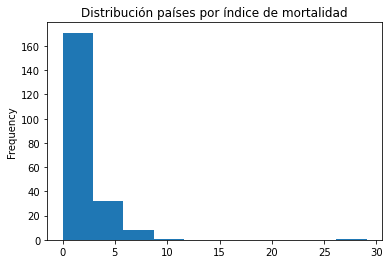

In [15]:
df_agrup['indice_mortalidad_COVID'].plot(kind= 'hist', title= 'Distribución países por índice de mortalidad')
plt.show()

Del histograma podemos sacar la conclusión de que la mayor parte de países tienen un índice de mortalidad que se encuentra entre el 0 y el 2,5%. 

Por otra parte, podemos observar que existen algunos casos cuyo índice de kortalidad está en torno al 28%. Se trata de un índice muy superior a la media de los países afectados por la pandemia. Esto indica que los datos dispuestos de este país no son fiables o faltan parte de ellos.

## Modelos

### Diferenciar grupos de países aplicando un algoritmo de clustering a los datos

Creamos un nuevo dataframe con las variables mas representativas de que disponemos en nuestro dataset

In [16]:
variables_clustering = ['cum14_casos_100k_ultimo_dia', 
                        'casos_100k', 
                        'muertes_100k', 
                        'indice_mortalidad_COVID']
df_clustering = df_agrup[variables_clustering]
df_clustering.head(20)

,cum14_casos_100k_ultimo_dia,casos_100k,muertes_100k,indice_mortalidad_COVID
countriesAndTerritories,,,,
United_States_of_America,327.136059,2823.529498,70.366359,2.492142
Brazil,143.795163,2631.707490,75.931469,2.885255
India,49.074304,605.058223,9.008738,1.488904
Mexico,61.319754,731.452973,72.192528,9.869743
United_Kingdom,469.115601,1581.259815,70.300120,4.445830
Italy,510.292109,1212.050203,64.710560,5.338934
France,829.924001,2188.285199,55.862393,2.552793
Spain,567.244732,2643.320651,77.245997,2.922309
Iran,113.550331,758.353006,43.102547,5.683705


In [17]:
df_clustering = df_clustering.sort_values(by = ['cum14_casos_100k_ultimo_dia'], ascending=False)
df_clustering.head(20)

,cum14_casos_100k_ultimo_dia,casos_100k,muertes_100k,indice_mortalidad_COVID
countriesAndTerritories,,,,
Belgium,1753.181152,3904.318958,103.513424,2.651254
Andorra,1660.606220,6416.634942,98.454914,1.534370
Czechia,1586.264531,3294.859997,34.310503,1.041334
Luxembourg,1337.853115,3111.449208,26.063131,0.837652
French_Polynesia,1240.668135,2600.211254,10.383658,0.399339
Slovenia,1082.460157,1739.913538,12.062042,0.693255
Switzerland,1081.522710,2054.765583,24.904831,1.212052
Armenia,991.166192,3204.351448,47.773156,1.490884
Liechtenstein,990.150607,1581.635312,7.816978,0.494234


#### Calculamos la correlación entre las variables

In [18]:
df_clustering.corr()

,cum14_casos_100k_ultimo_dia,casos_100k,muertes_100k,indice_mortalidad_COVID
cum14_casos_100k_ultimo_dia,1.000000,0.670030,0.501746,-0.086904
casos_100k,0.670030,1.000000,0.684265,-0.094868
muertes_100k,0.501746,0.684265,1.000000,0.233777
indice_mortalidad_COVID,-0.086904,-0.094868,0.233777,1.000000


De la tabla de correlaciones podemos obtener varias conclusiones:
- En el caso de los países que han tenido casos por cada 100k habitantes tienen un índice de correlación alto (68,4%) con los casos en los últimos 14 días.
- En cambio la relación con las muertes es baja (51,5%)
- No se ve una correlación fuerte entre las variables


### Para llevar a cabo la clusterización haremos uso del algoritmo de clasificación K-Means

In [19]:
#Importamos K-means
from sklearn.cluster import KMeans

**Se procede a preparar los datos para poder llevar a cabo la aplicación del algoritmo**

Primero se comprobará que no haya datos nulos

In [20]:
df_clustering.isnull().sum().sort_values(ascending=False)

cum14_casos_100k_ultimo_dia    3
muertes_100k                   2
casos_100k                     2
indice_mortalidad_COVID        0
dtype: int64

Borramos los datos nulos para evitar interferencias con los análisis

In [21]:
df_clustering = df_clustering.dropna()

Normalizamos los datospara que las diferentes unidades de medida que tienen nuestras variables esten a la misma escala y no interfieran con el modelo

In [22]:
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df_clustering)

normalized_df = normalize(scaled_df)

In [23]:
# Convertimos la matriz normalizada en un DataFrame
normalized_df = pd.DataFrame(normalized_df, columns = df_clustering.columns)

In [24]:
normalized_df.head(10)

,cum14_casos_100k_ultimo_dia,casos_100k,muertes_100k,indice_mortalidad_COVID
0,0.747726,0.392394,0.534849,0.029490
1,0.626086,0.637425,0.448146,-0.029527
2,0.892077,0.418168,0.150817,-0.081171
3,0.875089,0.459521,0.099628,-0.114604
4,0.899371,0.397668,-0.058030,-0.172116
5,0.951060,0.248380,-0.049426,-0.177059
6,0.929538,0.330602,0.120212,-0.110500
7,0.732721,0.568761,0.367590,-0.067145
8,0.941736,0.223898,-0.117113,-0.222008
9,0.723073,0.394258,0.564504,0.055333


### Modelo K-means

A la hora de llevar a cabo el modelo de clusterización mediante el algoritmo K-means deberemos prestar atención a los siguientes parámetros:
- Determinar correctamente el valor k (número de clusters).
- Inicializar correctamente los clusters

Para determinar el número de clústers correcto se procede a utilizar el método del codo. Este método lo que hace es calcular Kmeans para distintos valores de k y quedarse con el que el error sea mínimo. En este caso utilizaremos de error la variable 'inertia'que mediará el desajuste entre los datos y los clusters.

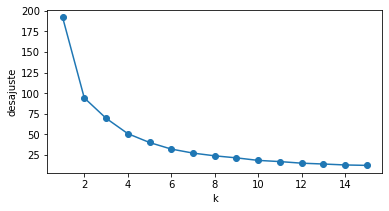

In [25]:
desajuste = []
for i in range (1, 16):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(normalized_df)
    desajuste.append(km.inertia_)
    
plt.figure(figsize =(6, 3))
plt.plot(range(1, 16), desajuste, marker='o')
plt.xlabel('k')
plt.ylabel('desajuste')
plt.show()

Podemos determinar que el mejor número de clusters es de 4 a 6. Si agregamos mas clusters no obtendremos ninguna ganancia

In [26]:
n_clusters = 4
km = KMeans(n_clusters=n_clusters)
km.fit(normalized_df)

KMeans(n_clusters=4)

In [27]:
# Agregamos la etiqueta de cada uno de los clusters al dataframe
df_clustering['Cluster'] = km.predict(normalized_df)
df_clustering.head(10)

,cum14_casos_100k_ultimo_dia,casos_100k,muertes_100k,indice_mortalidad_COVID,Cluster
countriesAndTerritories,,,,,
Belgium,1753.181152,3904.318958,103.513424,2.651254,1
Andorra,1660.606220,6416.634942,98.454914,1.534370,1
Czechia,1586.264531,3294.859997,34.310503,1.041334,3
Luxembourg,1337.853115,3111.449208,26.063131,0.837652,3
French_Polynesia,1240.668135,2600.211254,10.383658,0.399339,3
Slovenia,1082.460157,1739.913538,12.062042,0.693255,3
Switzerland,1081.522710,2054.765583,24.904831,1.212052,3
Armenia,991.166192,3204.351448,47.773156,1.490884,3
Liechtenstein,990.150607,1581.635312,7.816978,0.494234,3


In [28]:
# Cálculo promedio de cada uno de los clusters
df_clustering.groupby('Cluster').mean()

,cum14_casos_100k_ultimo_dia,casos_100k,muertes_100k,indice_mortalidad_COVID
Cluster,,,,
0,18.390733,224.190826,8.525944,4.933403
1,326.885842,2125.823387,50.884495,2.849107
2,24.277771,216.766154,2.617328,1.208944
3,483.378152,1653.094930,13.593248,0.984061


In [29]:
# Se crea un Headmap para visualizar los datos de los clusters

cm = sns.light_palette('red', as_cmap=True)
df_clustering.groupby('Cluster').mean().style.background_gradient(cmap='Reds')

,cum14_casos_100k_ultimo_dia,casos_100k,muertes_100k,indice_mortalidad_COVID
Cluster,,,,
0,18.390733,224.190826,8.525944,4.933403
1,326.885842,2125.823387,50.884495,2.849107
2,24.277771,216.766154,2.617328,1.208944
3,483.378152,1653.094930,13.593248,0.984061


Con el Headmap podemos observar las diferencias presentes entre cada uno de los clusters:

1- Cluster 0 = un índice de mortalidad muy elevado sin haber tenido gran cantidad de casos de Covid. Los países pertenecientes a este clúster es posible que hay una falta de datos de recuento de positivos en COVID.

2- Cluster 1 = gran incidencia de casos, tanto totales como en los últimos 14 días, con un índice de mortalidad medio.

3- Cluster 2 = baja incidencia de Covid, con índices bajos de contagios y baja mortalidad. Existe una fuerte correlación.

4- Cluster 3 = gran cantidad de casos, con índices de mortalidad bajos.

### Veamos la clasificación para algunos países

In [30]:
df_clustering.loc['Spain']

cum14_casos_100k_ultimo_dia     567.244732
casos_100k                     2643.320651
muertes_100k                     77.245997
indice_mortalidad_COVID           2.922309
Cluster                           1.000000
Name: Spain, dtype: float64

In [31]:
df_clustering.loc['France']

cum14_casos_100k_ultimo_dia     829.924001
casos_100k                     2188.285199
muertes_100k                     55.862393
indice_mortalidad_COVID           2.552793
Cluster                           1.000000
Name: France, dtype: float64

In [32]:
df_clustering.loc['Japan']

cum14_casos_100k_ultimo_dia     6.937553
casos_100k                     80.624909
muertes_100k                    1.403118
indice_mortalidad_COVID         1.740304
Cluster                         2.000000
Name: Japan, dtype: float64

In [33]:
df_clustering.loc['Belgium']

cum14_casos_100k_ultimo_dia    1753.181152
casos_100k                     3904.318958
muertes_100k                    103.513424
indice_mortalidad_COVID           2.651254
Cluster                           1.000000
Name: Belgium, dtype: float64

## Análisis en detalle de los 25 países con mayor número de contagio

In [34]:
top25country = df[['countriesAndTerritories', 'cases']].\
                    groupby('countriesAndTerritories').sum().\
                    sort_values('cases', ascending=False).\
                    nlargest(25, 'cases')
top25country

,cases
countriesAndTerritories,
United_States_of_America,9291245
India,8267623
Brazil,5554206
Russia,1655038
France,1466433
Spain,1240697
Argentina,1183118
Colombia,1093256
United_Kingdom,1053864


Se realizará una matriz de gráficos para ver la evolución de la tasa de casos de los últimos 14 días por 100k habitantes.

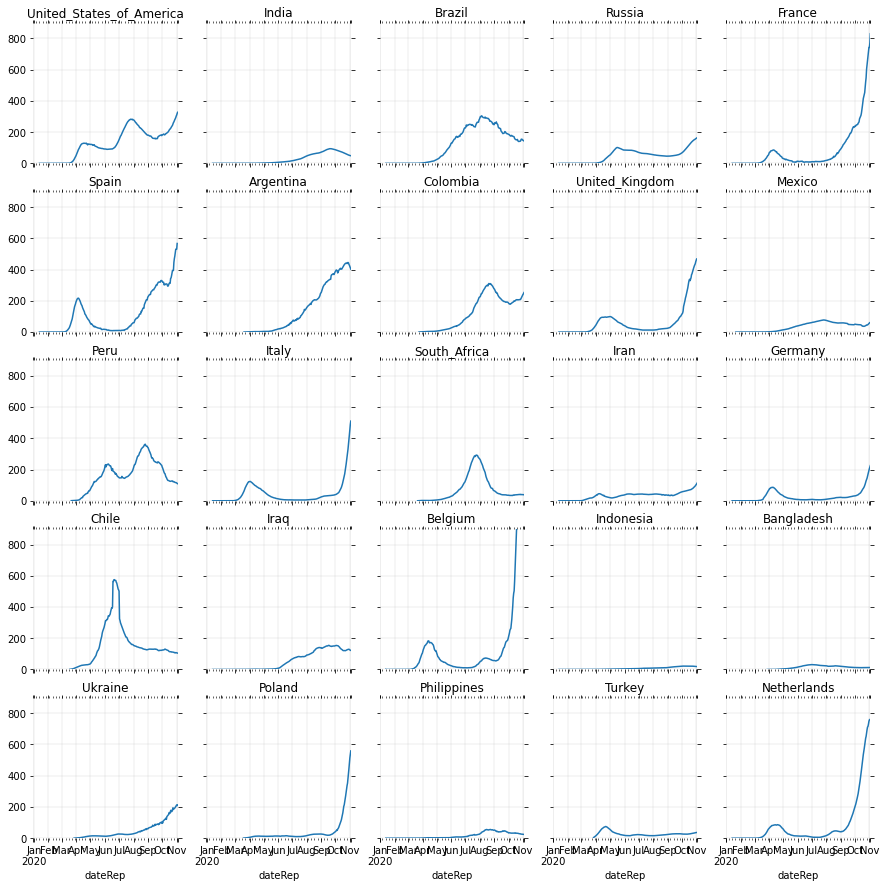

In [35]:
fig, axes = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True, figsize= (15,15))
axes_list = [item for sublist in axes for item in sublist]

for countryname in top25country.index.values:
    ax = axes_list.pop(0)
    selection=df[df['countriesAndTerritories']==countryname]['Cum14_cases_100k']
    selection.plot( y='Cum14_cases_100k', label=countryname, ax=ax, legend=False)
    ax.set_title(countryname)
    ax.tick_params(
        which='both',
        bottom='off',
        left='off',
        right='off',
        top='off'
    )
    ax.grid(linewidth=0.20)
    ax.set_ylim((0, 900))
    ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
#borramos todo lo que no usamos en el plot

for ax in axes_list:
    ax.remove()                   

En esta matriz de plots se puede observar la evolución de la pandemia desde principios de año hasta principios de noviembre. Se podrían analizar las diferentes políticas aplicadas en cada uno de los países y su efecto en los datos acumulados.

### Realizamos el estudio de la evolución de los casos en España

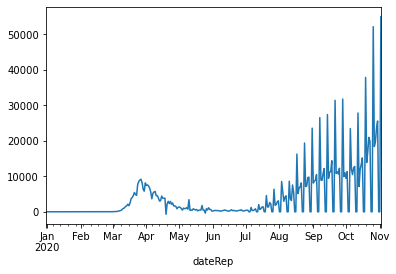

In [36]:
df[df['countriesAndTerritories']=='Spain']['cases'].plot()

Los picos que se observan vienen dada porque en fin de semana no se dan datos y a principios de semana se observa el crecimieto exponencial de los datos acumulados de fin de semana.

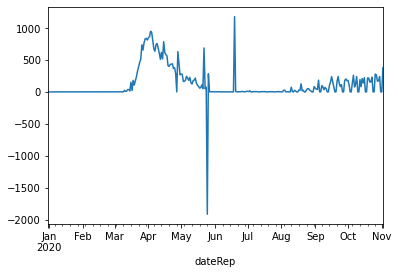

In [37]:
# Ahora miramos la evolución de las muertes en España
df[df['countriesAndTerritories']=='Spain']['deaths'].plot()

En este segundo plot de la evolución de muertes se pueden observar dos picos; uno de ellos positivo y otro negativo. Esto hace referencia a recuentos de muertes por Covid no contabilizadas en su momento de hecho.

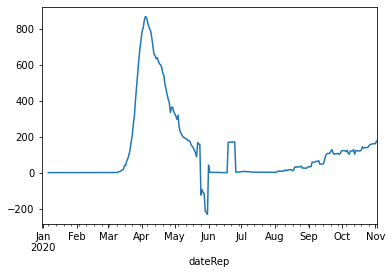

In [38]:
df[df['countriesAndTerritories']=='Spain']['deaths'].rolling(window=7).mean().plot()

### Como ha evolucionado el índice de mortalidad en España

In [41]:
#Se crea un dataframe donde queden representados los fallecimientos y los contagios.

df_fallecimientos = df[df['countriesAndTerritories'] == 'Spain'][['deaths','cases']]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BCD612D910>,
      dtype=object)

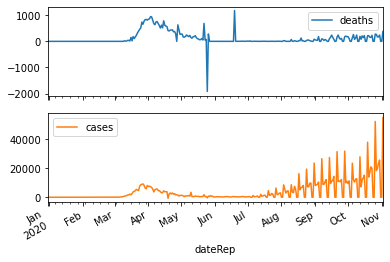

In [42]:
df_fallecimientos.plot(subplots=True)

Debido a que España es un país que no ha comunicado los datos de muertes y casos de forma diaria, ya que durante el fin de semana no ha comunicado ningún caso o fallecimiento, calculamos la media móvil para interpretar mejor los gráficos.

In [43]:
df_fallecimientos['deaths_mm7'] = df_fallecimientos['deaths'].rolling(window=7).mean()

In [44]:
df_fallecimientos['cases_mm7'] = df_fallecimientos['cases'].rolling(window=7).mean()

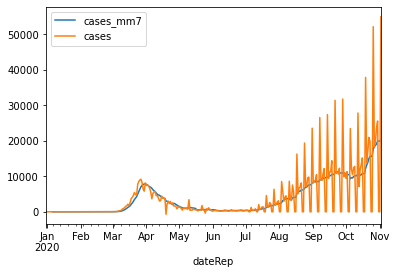

In [46]:
df_fallecimientos[['cases_mm7','cases']].plot()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002BCDBA31B50>,
      dtype=object)

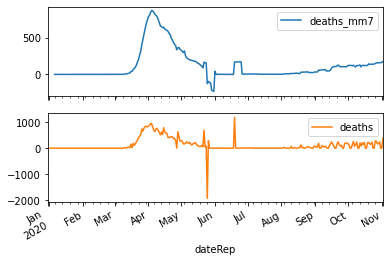

In [48]:
df_fallecimientos[['deaths_mm7','deaths']].plot(subplots=True)

In [49]:
df_fallecimientos['indice_mortalidad'] = df_fallecimientos['deaths_mm7']/df_fallecimientos['cases_mm7']*100

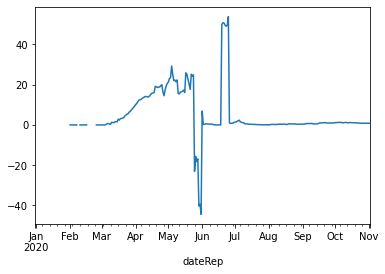

In [50]:
df_fallecimientos['indice_mortalidad'].plot()

Esta diferencia en la gráfica es debida a que los datos estadísticos de la pandemia no se han tratado de la forma correcta. Otro factor que influye en los datos es la evolución de los protocolos seguidos para la detección de casos, ya que han ido variando a lo largo del tiempo.

**Se procede a dividir los datos en las dos oleadas de la pandemia, y así eliminar la parte donde España realizó el ajuste en las muertes**

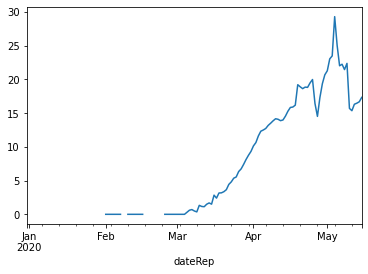

In [53]:
df_fallecimientos.loc[:'2020-05-15']['indice_mortalidad'].plot()

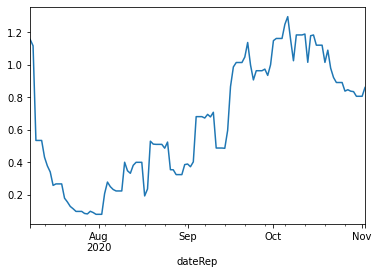

In [54]:
df_fallecimientos['indice_mortalidad'].iloc[190:].plot()

En este último gráfico podemos observar la evolución del índice de mortalidad durante la segunda ola de la pandemia. Se puede observar que un índice de mortalidad acorde a la realidad, ya que no existen ajustes en los datos, como si ocurre durante la primera ola, donde no se apuntaban todos los casos reales, ya que no se hacían pruebas PCR.

In [55]:
df_fallecimientos['indice_mortalidad_2'] = df_fallecimientos['deaths_mm7']\
                                        /df_fallecimientos['cases_mm7'].shift(14)*100

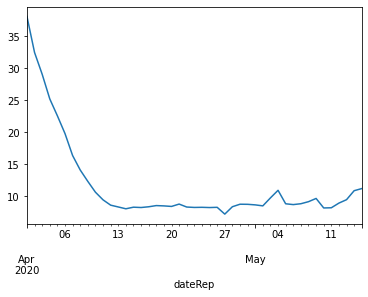

In [57]:
df_fallecimientos.loc['2020-04-1':'2020-05-15']['indice_mortalidad_2'].plot()

Aquí podemos observar, como después de los ajustes en los datos de casos y muertos, el índice de mortalidad se va ajustando a dats reales. También coincidió con el cambio en los protocolos de detección de casos mediantes las pruebas PCR.

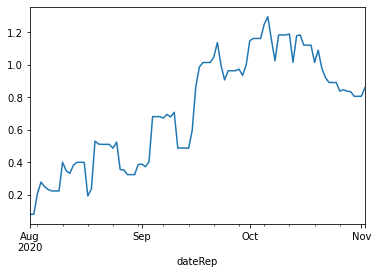

In [60]:
df_fallecimientos['indice_mortalidad'].loc['2020-08-1':].plot();

En este último gráfico se observa la evolución del índice de mortalidad a lo largo de la segunda ola. Se puede determinar que el índice real se mueve entre el 0,2% y un 1% (dato muy elevado para una pandemia de esta tipología.

## Modelo de predicción

**Se utilizará un modelo de regresión SVR con el objetivo de determinar la predicción de la evolución futura de la pandemia con los datos que tenemos hasta hoy. Y como variable utilizamos el número de días que han transcurrido desde el inicio de la pandemia en España.**

In [61]:
# Se utiliza la variable de media movil semanal de casos.
data = pd.DataFrame(df_fallecimientos['cases_mm7'])

In [70]:
#El inicio de la pandemia lo indica cuando llegamos al caso 100
fecha100 = data[data.cases_mm7.cumsum()<100].index.max()
fecha100

Timestamp('2020-03-03 00:00:00')

In [71]:
data = data[fecha100:]
data

,cases_mm7,n-dia
dateRep,,
2020-03-03,27.000000,63
2020-03-04,36.857143,64
2020-03-05,47.285714,65
2020-03-06,70.857143,66
2020-03-07,101.428571,67
...,...,...
2020-10-29,19114.571429,303
2020-10-30,19935.142857,304
2020-10-31,19935.142857,305


In [73]:
data['n-dia']=0
for i in range(data.shape[0]):
    data['n-dia'][i]=i

data

,cases_mm7,n-dia
dateRep,,
2020-03-03,27.000000,0
2020-03-04,36.857143,1
2020-03-05,47.285714,2
2020-03-06,70.857143,3
2020-03-07,101.428571,4
...,...,...
2020-10-29,19114.571429,240
2020-10-30,19935.142857,241
2020-10-31,19935.142857,242


Observando los datos, desarrollamos el modelo solo a partir del 1 de mayo como fecha inicio

In [76]:
data = data.loc['2020-05-1':]

data

,cases_mm7,n-dia
dateRep,,
2020-05-01,1543.857143,59
2020-05-02,1362.142857,60
2020-05-03,1261.285714,61
2020-05-04,1090.714286,62
2020-05-05,1021.285714,63
...,...,...
2020-10-29,19114.571429,240
2020-10-30,19935.142857,241
2020-10-31,19935.142857,242


In [77]:
x = data['n-dia'].values

x

array([ 59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,
        85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110,
       111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123,
       124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
       150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
       163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175,
       176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188,
       189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201,
       202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214,
       215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227,
       228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 23

In [79]:
y = data['cases_mm7'].values

y

array([ 1543.85714286,  1362.14285714,  1261.28571429,  1090.71428571,
        1021.28571429,  1026.        ,   980.28571429,   949.71428571,
         879.57142857,  1234.        ,  1223.57142857,  1144.        ,
        1081.        ,  1070.71428571,   995.        ,   962.42857143,
         567.57142857,   548.        ,   540.71428571,   552.        ,
         499.57142857,   663.        ,   656.        ,   631.71428571,
         542.        ,   603.14285714,   602.        ,   695.57142857,
         534.28571429,   562.57142857,   522.42857143,   605.42857143,
         524.71428571,   508.14285714,   393.42857143,   344.85714286,
         297.42857143,   303.        ,   297.        ,   290.57142857,
         279.14285714,   292.42857143,   318.71428571,   327.85714286,
         339.71428571,   341.71428571,   337.42857143,   343.28571429,
         365.85714286,   338.        ,   333.28571429,   334.85714286,
         342.14285714,   346.28571429,   343.28571429,   316.85714286,
      

In [81]:
#Normalizo los datos de la variable

x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [83]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()

x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)


In [111]:
from sklearn.svm import SVR

regressor = SVR(kernel = 'rbf', C= 100, gamma= .1, epsilon= .1)
regressor.fit(x, y)
    

SVR(C=100, gamma=0.1)

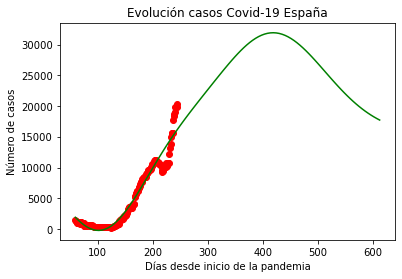

In [162]:
x_grid = np.arange(min(x), max(x)*5, 0.1)
x_grid = x_grid.reshape((len(x_grid),1))
prediccion = regressor.predict(x_grid)
prediccion_t = np.rint(sc_y.inverse_transform(prediccion))
x_t = sc_x.inverse_transform(x)
y_t = sc_y.inverse_transform(y)
plt.scatter(x_t, y_t, color= 'red')
x_grid_t = sc_x.inverse_transform(x_grid)
plt.plot(x_grid_t, prediccion_t, color='green')
plt.title('Evolución casos Covid-19 España')
plt.ylabel('Número de casos')
plt.xlabel('Días desde inicio de la pandemia')
plt.show()

Para ajustar mejor el modelo, cogemos los datos solo de la segunda ola de la pandemia y así observamos la previsión de evolución.

**Previsión máximo pandemia**

In [164]:
maximo = np.max(prediccion_t)
maximo

31951.0

In [165]:
# El dia que alcanzaremos el máximo?

dias_maximo = np.rint(x_grid_t[np.where(prediccion_t == maximo)][0,0])
dias_maximo

419.0

In [166]:
fecha100 + datetime.timedelta(days=dias_maximo)

Timestamp('2021-04-26 00:00:00')

Con los datos extraidos del modelo de predicción podemos indicar que el máximo de casos se daran el próximo día 26 de abril de 2021 alcanzando los 31951 casos. 

**Se debe tener en cuenta que se trata de una predicción y conociendo que los datos estadísticos de la primera ola fueron incorrectos debido a la falta de ellos o recuentos tardíos**